In [2]:
import pkg_resources
import numpy as np
import xarray as xr
from Magics import macro as magics
from nmc_met_graphics.magics.util import minput_xarray

ModuleNotFoundError: No module named 'nmc_met_graphics.magics.utility'

In [31]:
filepath = "http://thredds.atmos.albany.edu:8080/thredds/dodsC/CFSR/2020/t.2020.0p5.anl.nc"
ds = xr.open_dataset(filepath)

In [32]:
ds1 = ds.loc[{'time':np.datetime64('2020-01-01T00'), 'lev': 850.0}]

In [26]:
ds1 = ds1.load()

In [33]:
ds1['t'].values = ds1['t'].values - 273.15

In [34]:
ds1['t'].values

array([[-17.449997, -17.549988, -17.549988, ..., -17.449997, -17.449997,
        -17.449997],
       [-18.449997, -18.449997, -18.549988, ..., -18.449997, -18.449997,
        -18.449997],
       [-18.549988, -18.549988, -18.549988, ..., -18.549988, -18.549988,
        -18.549988],
       ...,
       [-23.049988, -23.049988, -23.049988, ..., -23.049988, -23.049988,
        -23.049988],
       [-23.149994, -23.149994, -23.149994, ..., -23.149994, -23.149994,
        -23.149994],
       [-23.249985, -23.249985, -23.249985, ..., -23.249985, -23.249985,
        -23.249985]], dtype=float32)

In [35]:
data = minput_xarray(ds1, 't', metadata={'units': 'K', 'long_name': 'temperature'})

In [5]:
data = magics.mxarray(ds, 't', {'time': ds['time'].values[0], 'lev':1000.0})

In [6]:
data

 input_field = '[[263.70001221 263.70001221 263.70001221 ... 263.70001221 263.70001221
  263.70001221]
 [262.70001221 262.70001221 262.6000061  ... 262.70001221 262.70001221
  262.70001221]
 [262.6000061  262.6000061  262.6000061  ... 262.6000061  262.6000061
  262.6000061 ]
 ...
 [245.1000061  245.19999695 245.19999695 ... 245.1000061  245.1000061
  245.1000061 ]
 [245.40000916 245.5        245.5        ... 245.40000916 245.40000916
  245.40000916]
 [245.80000305 245.80000305 245.80000305 ... 245.80000305 245.80000305
  245.80000305]]'
 input_latitudes_list = '[-90.  -89.5 -89.  -88.5 -88.  -87.5 -87.  -86.5 -86.  -85.5 -85.  -84.5
 -84.  -83.5 -83.  -82.5 -82.  -81.5 -81.  -80.5 -80.  -79.5 -79.  -78.5
 -78.  -77.5 -77.  -76.5 -76.  -75.5 -75.  -74.5 -74.  -73.5 -73.  -72.5
 -72.  -71.5 -71.  -70.5 -70.  -69.5 -69.  -68.5 -68.  -67.5 -67.  -66.5
 -66.  -65.5 -65.  -64.5 -64.  -63.5 -63.  -62.5 -62.  -61.5 -61.  -60.5
 -60.  -59.5 -59.  -58.5 -58.  -57.5 -57.  -56.5 -56.  -55.5 -55.  

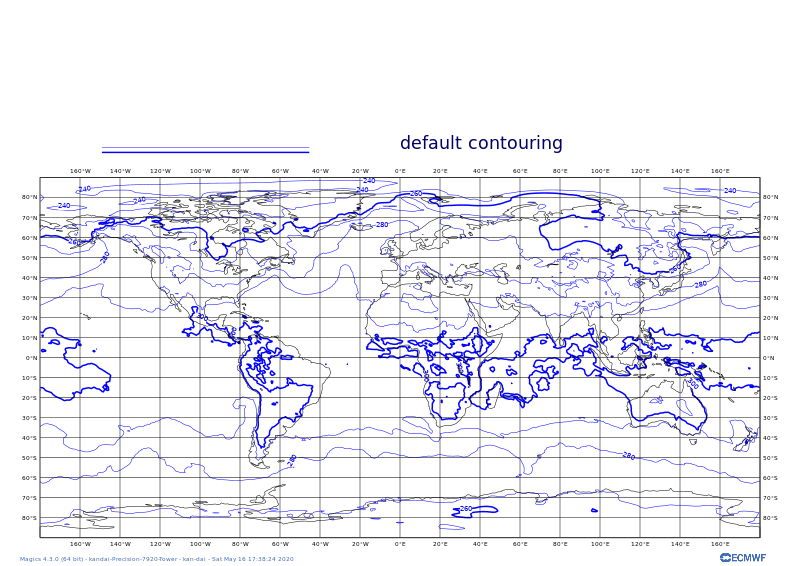

In [7]:
contour = magics.mcont(contour_automatic_setting = 'ecmwf', legend='on')
legend = magics.mlegend(legend_display_type = "continuous", 
                        legend_text_font_size=0.75,
                        legend_text_colour ='navy')
magics.plot(data, contour, legend, magics.mcoast())

In [9]:
# set up map ground
projection = magics.mmap(
    subpage_x_length = 25.,
    subpage_y_length = 18.,
    subpage_map_area_definition_polar="centre",
    subpage_map_vertical_longitude = 105,
    subpage_map_centre_latitude = 35,
    subpage_map_centre_longitude = 105,
    subpage_map_scale = 28.e6,
    subpage_clipping = 'on',
    subpage_map_projection        = "polar_stereographic",
    page_id_line                   = "off")

In [11]:
# set map boundary
coast = magics.mcoast(
    map_label = "on",
    map_label_left = "on",
    map_label_height=0.5,
    map_grid = "on",
    map_grid_line_style = "dot")

shpfile1 = pkg_resources.resource_filename('nmc_met_graphics', 'resources/maps/bou2_4l')
coast_province = magics.mcoast(
    map_user_layer="on",
    map_user_layer_name = shpfile1,
    map_user_layer_colour = "navy",
    map_label = "off",
    map_grid = "off")

shpfile2 = pkg_resources.resource_filename('nmc_met_graphics', 'resources/maps/hyd1_4l')
coast_river = magics.mcoast(
    map_user_layer="on",
    map_user_layer_name = shpfile2,
    map_user_layer_colour = "blue",
    map_label = "off",
    map_grid = "off")

In [45]:
# set up 
contour = magics.mcont(
    contour_level_selection_type = "interval",
    contour_interval             = 3,
    contour_shade_method         = "area_fill",
    contour_shade                = "on",
    contour_shade_max_level      =  39.00,
    contour_shade_min_level      = -39.00,
    contour_label                = "off",
    legend                       = "on",
    contour                      = "off",
    contour_shade_colour_method  = "list",
    contour_shade_colour_list    = ["#dce1e7", "#9ca3b2", "#536175", "#13203a", "#22384f", "#3f6273",
                                    "#598c94", "#79b7b9", "#98e4dc", "#e4d7ef", "#ccb6e3", "#b698d5",
                                    "#a17dc8", "#7acea4", "#5aae66", "#3e922d",
                                    "#7ebd0d", "#c7e700", "#fff800", "#ffad00", "#ff6800", "#ca2f00",
                                    "#971a05", "#631708", "#cc0000", "#ff0000"])

# Defining legend for temperature
legend = magics.mlegend(
    legend_display_type        = "continuous",
    legend_box_mode            = "positional",
    legend_title               = "on",
    legend_title_text          = "Temperature at 850 hPa",
    legend_automatic_position  = "top",
    legend_box_x_position =27.8,
    legend_box_y_position = 0.5,
    legend_box_x_length = 2,
    legend_box_y_length = 19,
    legend_label_frequency     = 2,
    legend_text_font_size      = "0.5",
    legend_text_colour         = "charcoal",    
    legend_entry_border        = "on",
    legend_entry_border_colour = "none") 

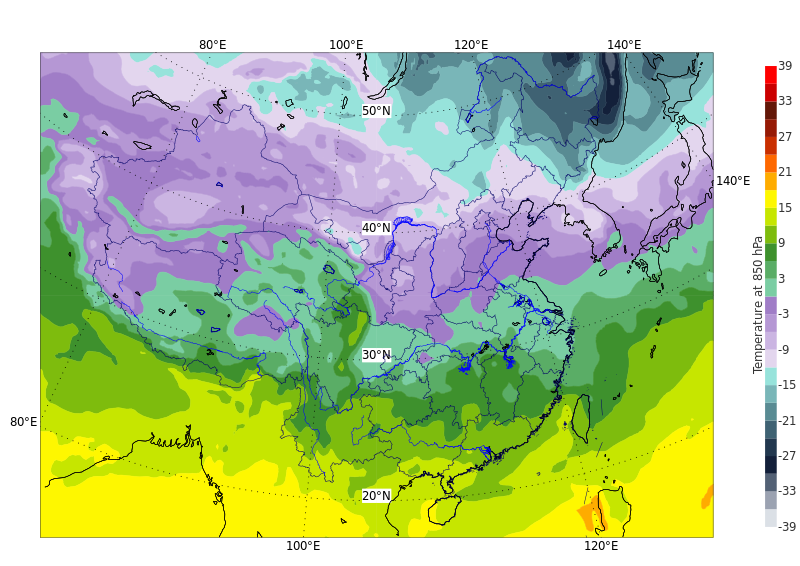

In [46]:
magics.plot(projection, data, contour, legend, coast, coast_province, coast_river)

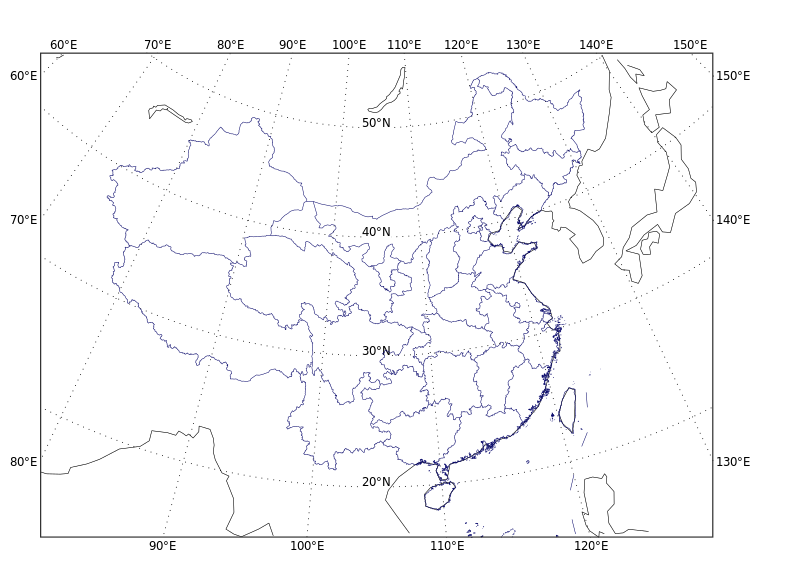

In [1]:
from nmc_met_graphics.magics import map_set
import Magics.macro as magics

# %%
#Setting of the output file name
output = magics.output(
    output_formats= ['png'],
    output_name_first_page_number= 'off',
    output_name= 'test01')

# Setting the coordinates of the geographical area
china_map = map_set.get_mmap(
    name='CHINA_POLAR_STEREOGRAPHIC',
    subpage_frame_thickness = 5,
    subpage_clipping='on')

# Background Coaslines
coast = map_set.get_mcoast(
    name = 'COAST',
    map_label = "on",
    map_label_height=0.5, 
    map_grid = "on",
    map_grid_thickness=0.2,
    map_grid_line_style="dot",
    map_grid_latitude_increment=10,
    map_grid_longitude_increment=10)
china_coast = map_set.get_mcoast(
    name = 'PROVINCE')

# To the plot
magics.plot(china_map, coast, china_coast)

In [2]:
china_map

 subpage_map_projection = 'polar_stereographic'
 subpage_frame_thickness = '5'
 subpage_clipping = 'on'
 page_id_line = 'off'
 subpage_x_length = '25'
 subpage_y_length = '18'
 subpage_map_area_definition_polar = 'center'
 subpage_map_vertical_longitude = '105'
 subpage_map_centre_latitude = '35'
 subpage_map_centre_longitude = '105'
 subpage_map_scale = '30000000.0'